# Wrangle Report

## Gather

Start from import related module

In [1]:
import tweepy
import pandas as pd
import json
import requests
import numpy as np
%matplotlib inline

Read file 'twitter-archive-enhanced.csv' save it in df1

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [4]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Download "image_predictions.tsv" from Udacity's servers

In [5]:
url = r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

img_pred = pd.read_csv(url, sep ='\t')

In [6]:
img_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [7]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Query data using tweetpy

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Read tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Save this file in df.

In [8]:
with open('tweet_json.txt') as file:
    status = []    
    for line in file:
        status.append(json.loads(line))

df = pd.DataFrame.from_dict(status)

In [9]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assess

start with twitter data

In [37]:
# Look at table structure
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [39]:
df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


look at data from udacity's server

In [40]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


look at twitter-archive-enhanced.csv

In [42]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality

table tweet json.txt (df)

- 3 columns (contributors, coordinates, geo) have no data at all.
- Missing values columns are extended_entities, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str,retweeted_status) 
- 15 columns have data completed for all rows (created_at, display_text_range, entities, favorite_count, favorited, full_text, id, id_str, is_quote_status, lang, retweet_count, retweeted, source, truncated, user)
- Column 'created_at' has incorrect datatype. It should be date time
- Column 'Source' has information of source (twitter for iphone, twitter web client) together with non related information <a href....>
- Column 'display_text_range' has stored as object

table twitter-archive-enhanced.csv (df1)

- Column 'rating_numerator' has wrong information (not equal to 10)
- Column 'timestampt' has +0000 inside

### Tidiness

table 'tweet json.txt' (df)

- Not need: 'contributors','coordinates','entities','extended_entities','favorited','full_text','user','id_str', 'truncated', 'entities', 'extended_entities','in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo','coordinates', 'place', 'contributors', 'is_quote_status', 'possibly_sensitive','possibly_sensitive_appealable','quoted_status','quote_status_id','quoted_status_id_str','retweeted','retweeted_status'
- Need to combine data from 3 table using 'id' as key to create final table 

table twitter-archive-enhanced.csv (df1)

- Not need column: 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp','retweeted_status_timestamp', 'expanded_urls'

table img_pred (img_pred)

- Not need column: jpg_url, img_num
- Interested only p1 prediction. Remove p2 and p3

## Clean: table tweet json.txt (df)

#### Define

- remove not necessary columns
- change column 'created_at' to date time
- remove unnecessary text to collect twitter source from column 'source'
- change text lenght to integer from column 'display_text_range'

#### Code

In [44]:
df_clean = df.copy()

In [45]:
# remove not necessary columns

excl_cols = ['contributors','coordinates','entities','extended_entities','favorited','full_text','user','id_str', 'truncated', 'entities', 'extended_entities','in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo','coordinates', 'place', 'contributors', 'is_quote_status', 
             'possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id',
            'quoted_status_id_str','retweeted','retweeted_status']

df_clean.drop(columns = excl_cols,inplace = True)

In [46]:
# change column 'created_at' to date time

def convertdate(x):
    
    z = x.split(' ')
    date_str = z[2] + '-'+z[1]+'-'+z[5] + ' ' + z[3]
    
    return pd.to_datetime(date_str, format = '%d-%b-%Y %H:%M:%S')

df_clean['created_at'] = df_clean['created_at'].apply(convertdate)

In [47]:
# remove unnecessary text to collect twitter source from column 'source'

df_clean['source'] = df_clean.source.apply(lambda x: x[x.find('>',10)+1:x.find('<',10)])

In [48]:
# change text lenght to integer from column 'display_text_range'
df_clean['display_text_range'] = df_clean.display_text_range.apply(lambda x: x[1])

#### Test

In [49]:
# Unnecssary columns should be removed
df_clean.head()

,created_at,display_text_range,favorite_count,id,lang,retweet_count,source
0,2017-08-01 16:23:56,85,39467,892420643555336193,en,8853,Twitter for iPhone
1,2017-08-01 00:17:27,138,33819,892177421306343426,en,6514,Twitter for iPhone
2,2017-07-31 00:18:03,121,25461,891815181378084864,en,4328,Twitter for iPhone
3,2017-07-30 15:58:51,79,42908,891689557279858688,en,8964,Twitter for iPhone
4,2017-07-29 16:00:24,138,41048,891327558926688256,en,9774,Twitter for iPhone


In [50]:
# columns created_at should be change to date/time
# column display_text_range should be change to integer

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
created_at            2354 non-null datetime64[ns]
display_text_range    2354 non-null int64
favorite_count        2354 non-null int64
id                    2354 non-null int64
lang                  2354 non-null object
retweet_count         2354 non-null int64
source                2354 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 128.8+ KB


In [51]:
# column source should only show relevant text

df_clean['source'] = df_clean.source.apply(lambda x: x[x.find('>',10)+1:x.find('<',10)])
df_clean.source.value_counts()

Twitter for iPhon     2219
Vine - Make a Scen      91
Twitter Web Clien       33
TweetDec                11
Name: source, dtype: int64

## Clean: table twitter-archive-enhanced.csv

#### Define

- remove not necessary columns
- change column 'rating_denominator' to 10 when figure is not equal to 10

#### Code

In [52]:
df1_clean = df1.copy()

In [53]:
# remove not necessary columns

excl_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']

df1_clean.drop(columns = excl_col, inplace = True)

In [54]:
# replace denominator not equal to 10 with 10

df1_clean.rating_denominator = np.where(df1_clean.rating_denominator !=10,10,df1_clean.rating_denominator)

#### Test

In [55]:
# Unnecssary columns should be removed
df1_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,12,10,Franklin,None,None,None,None


In [56]:
# no denominator more than 10
df1_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

## Clean table img_pred

#### Define

- remove not necessary column

#### Code

In [57]:
img_pred_clean = img_pred.copy()

In [58]:
img_pred_clean.drop(columns = ['jpg_url', 'img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace = True)

#### Test

In [59]:
img_pred_clean.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


### Combine 3 table to prepare for final table to use for data analysis

In [60]:
df_combine = df_clean.merge(df1_clean,how = 'left', left_on ='id', right_on = 'tweet_id')

In [61]:
df_combine.head()

,created_at,display_text_range,favorite_count,id,lang,retweet_count,source,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56,85,39467,892420643555336193,en,8853,Twitter for iPhon,892420643555336193,13,10,Phineas,None,None,None,None
1,2017-08-01 00:17:27,138,33819,892177421306343426,en,6514,Twitter for iPhon,892177421306343426,13,10,Tilly,None,None,None,None
2,2017-07-31 00:18:03,121,25461,891815181378084864,en,4328,Twitter for iPhon,891815181378084864,12,10,Archie,None,None,None,None
3,2017-07-30 15:58:51,79,42908,891689557279858688,en,8964,Twitter for iPhon,891689557279858688,13,10,Darla,None,None,None,None
4,2017-07-29 16:00:24,138,41048,891327558926688256,en,9774,Twitter for iPhon,891327558926688256,12,10,Franklin,None,None,None,None


In [62]:
# remove duplicate column
df_combine.drop(columns = ['tweet_id'],inplace = True)

combine wiht image data to get dog breed information

In [63]:
df_combine = df_combine.merge(img_pred_clean,how = 'left', left_on = 'id', right_on ='tweet_id')

In [66]:
df_combine.head()

,created_at,display_text_range,favorite_count,id,lang,retweet_count,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,p1,p1_conf,p1_dog
0,2017-08-01 16:23:56,85,39467,892420643555336193,en,8853,Twitter for iPhon,13,10,Phineas,None,None,None,None,8.924206e+17,orange,0.097049,False
1,2017-08-01 00:17:27,138,33819,892177421306343426,en,6514,Twitter for iPhon,13,10,Tilly,None,None,None,None,8.921774e+17,Chihuahua,0.323581,True
2,2017-07-31 00:18:03,121,25461,891815181378084864,en,4328,Twitter for iPhon,12,10,Archie,None,None,None,None,8.918152e+17,Chihuahua,0.716012,True
3,2017-07-30 15:58:51,79,42908,891689557279858688,en,8964,Twitter for iPhon,13,10,Darla,None,None,None,None,8.916896e+17,paper_towel,0.170278,False
4,2017-07-29 16:00:24,138,41048,891327558926688256,en,9774,Twitter for iPhon,12,10,Franklin,None,None,None,None,8.913276e+17,basset,0.555712,True


In [67]:
# remove duplicate column
df_combine.drop(columns = ['tweet_id'], inplace = True)

In [68]:
df_combine.head()

,created_at,display_text_range,favorite_count,id,lang,retweet_count,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog
0,2017-08-01 16:23:56,85,39467,892420643555336193,en,8853,Twitter for iPhon,13,10,Phineas,None,None,None,None,orange,0.097049,False
1,2017-08-01 00:17:27,138,33819,892177421306343426,en,6514,Twitter for iPhon,13,10,Tilly,None,None,None,None,Chihuahua,0.323581,True
2,2017-07-31 00:18:03,121,25461,891815181378084864,en,4328,Twitter for iPhon,12,10,Archie,None,None,None,None,Chihuahua,0.716012,True
3,2017-07-30 15:58:51,79,42908,891689557279858688,en,8964,Twitter for iPhon,13,10,Darla,None,None,None,None,paper_towel,0.170278,False
4,2017-07-29 16:00:24,138,41048,891327558926688256,en,9774,Twitter for iPhon,12,10,Franklin,None,None,None,None,basset,0.555712,True


In [85]:
# export file as deliverable from wrangling process

df_combine.to_csv('twitter_archive_master.csv')

## Start data analysis

In [69]:
# create day name column
df_combine['DayofWeekCreate'] = df_combine['created_at'].dt.day_name()

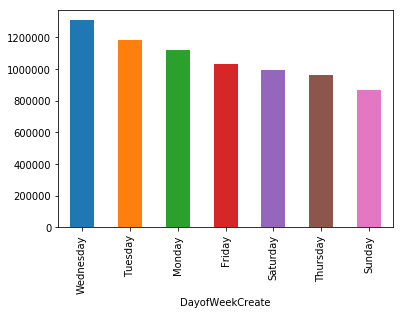

In [84]:
# relationship between day of twitter create and favorite count
df_combine.groupby( by='DayofWeekCreate').sum()['retweet_count'].sort_values(ascending = False).plot.bar()

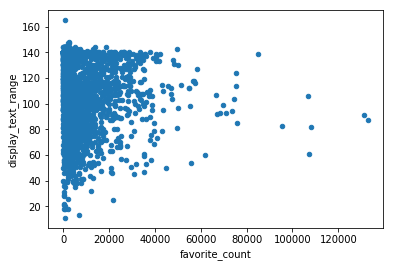

In [71]:
# relationship between favorite count and display text range
df_combine.plot(kind = 'scatter',x = 'favorite_count', y= 'display_text_range')

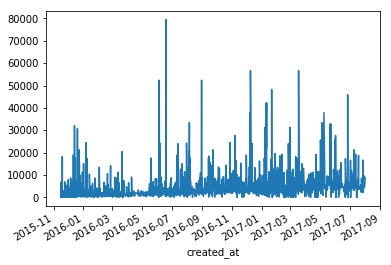

In [72]:
# relationship between twitter create date and # of retweet
df_combine.groupby(by = 'created_at').sum()['retweet_count'].plot.line()

In [79]:
# maximum retweet for this group of information
df_combine.groupby(by = 'created_at').sum()['retweet_count'].sort_values(ascending = False)[0]

79515

In [83]:
# Total dog breed
df_combine.p1.nunique()

378

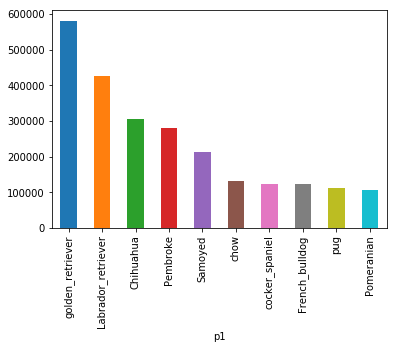

In [80]:
# Dog breed popularity top 10

df_combine.groupby(by='p1').sum()['retweet_count'].sort_values(ascending = False)[:10].plot.bar()

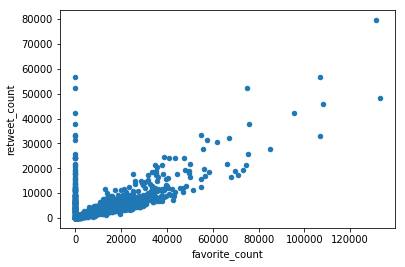

In [40]:
# relationship between favorite and retweet

df_combine.plot(kind ='scatter',x = 'favorite_count', y= 'retweet_count')

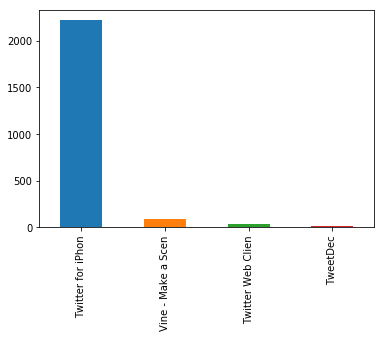

In [45]:
# From what channel users use to access twitter.

df_combine.source.value_counts().plot.bar()